In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("final_clean.csv", sep =';')

In [4]:
df = df.drop(['Column1'], axis=1)

In [4]:
df

Season                 Name Transfer Sum             From  FromCountry  \
0       20/21        Arthur Cabral  4,40 Mio. €        Palmeiras       Brazil   
1       20/21            Kaly Sene  4,00 Mio. €     Juventus U19        Italy   
2       20/21        Edon Zhegrova  3,00 Mio. €        KRC Genk       Belgium   
3       20/21        Andrea Padula   450 Tsd. €      FC Wil 1900  Switzerland   
4       20/21        Heinz Lindner   ablösefrei  Wehen Wiesbaden      Germany   
...       ...                  ...          ...              ...          ...   
4023  11. Dez  Mickaël Facchinetti        Leihe        FC Lugano  Switzerland   
4024  11. Dez       Palmiro Di Dio            -        FC Lugano  Switzerland   
4025  11. Dez       Patrice Feussi            -        FC Lugano  Switzerland   
4026  11. Dez          Rijat Shala            -        FC Lugano  Switzerland   
4027  11. Dez       Fabio Liverani            -        FC Lugano  Switzerland   

     FromLanguage FromLanguageFamily             To     ToCountry  \
0      Portuguese            Romance       FC Basel   Switzerland   
1         Italian            Romance       FC Basel   Switzerland   
2          French            Romance       FC Basel   Switzerland   
3          German           Germanic       FC Basel   Switzerland   
4          German           Germanic       FC Basel   Switzerland   
...           ...                ...            ...           ...   
4023      Italian            Romance  Chievo Verona         Italy   
4024      Italian            Romance  FC Lugano U21   Switzerland   
4025      Italian            Romance     Vereinslos    Vereinslos   
4026      Italian            Romance     Vereinslos    Vereinslos   
4027      Italian            Romance   Karriereende  Karriereende   

        ToLanguage ToLanguageFamily  
0           German         Germanic  
1           German         Germanic  
2           German         Germanic  
3           German         Germanic  
4           German         Germanic  
...            ...              ...  
4023       Italian          Romance  
4024       Italian          Romance  
4025    Vereinslos       Vereinslos  
4026    Vereinslos       Vereinslos  
4027  Karriereende     Karriereende  

[4028 rows x 11 columns]

In [5]:
df_temp = df

### Creating different ID's

In [6]:
ids = []
clubs = []
for i , club in enumerate(pd.concat([df['To'],df['From']]).unique()):
    ids.append(i)
    clubs.append(club)
    
df_club_id_from = pd.DataFrame({'id_From': ids, 'From':clubs})    
df_club_id_to = pd.DataFrame({'id_To': ids, 'To':clubs})

In [7]:
idLF = []
LF = []
for i , LaF in enumerate(pd.concat([df['ToLanguageFamily'],df['FromLanguageFamily']]).unique()):
    idLF.append(i)
    LF.append(LaF)
    
df_LF_id_from = pd.DataFrame({'id_FromLF': idLF, 'FromLanguageFamily':LF})    
df_LF_id_to = pd.DataFrame({'id_ToLF': idLF, 'ToLanguageFamily':LF})

In [8]:
idL = []
L = []
for i , La in enumerate(pd.concat([df['ToLanguage'],df['FromLanguage']]).unique()):
    idL.append(i)
    L.append(La)
    
df_L_id_from = pd.DataFrame({'id_FromL': idL, 'FromLanguage':L})    
df_L_id_to = pd.DataFrame({'id_ToL': idL, 'ToLanguage':L})

In [9]:
df_temp = pd.merge(df_temp, df_club_id_from , how = 'inner', on='From')

In [10]:
df_temp = pd.merge(df_temp, df_club_id_to , how = 'inner', on='To')

In [11]:
df_temp = pd.merge(df_temp, df_LF_id_from , how = 'inner', on='FromLanguageFamily')

In [12]:
df_temp = pd.merge(df_temp, df_LF_id_to , how = 'inner', on='ToLanguageFamily')

In [13]:
df_temp = pd.merge(df_temp, df_L_id_from , how = 'inner', on='FromLanguage')

In [14]:
df_temp = pd.merge(df_temp, df_L_id_to , how = 'inner', on='ToLanguage')

End Create ID

In [15]:
#Create Dataframe with all ID's
df_id = df_temp[['id_From','id_To', 'id_FromLF', 'id_ToLF', 'id_FromL', 'id_ToL']]

counting every column ist pretty interesting because of unexpected numbers

In [16]:
df_temp=df_temp.reset_index()
count_to_lang = df_temp['ToLanguage'].value_counts()
count_from = df_temp['From'].value_counts()
count_to_ = df_temp['To'].value_counts()
count_from_lang = df_temp['FromLanguage'].value_counts()
count_to_lang_fam = df_temp['ToLanguageFamily'].value_counts()
count_from_lang_fam = df_temp['FromLanguageFamily'].value_counts()

applying frequencies to the Dataframe

In [17]:
df_temp['freq_From'] = df_temp.groupby(by='From')['From'].transform('count')
df_temp['freq_FromCountry'] = df_temp.groupby(by='FromCountry')['FromCountry'].transform('count')
df_temp['freq_FromLanguage'] = df_temp.groupby(by='FromLanguage')['FromLanguage'].transform('count')
df_temp['freq_FromLanguageFamily'] = df_temp.groupby(by='FromLanguageFamily')['FromLanguageFamily'].transform('count')
df_temp['freq_To'] = df_temp.groupby(by='To')['To'].transform('count')
df_temp['freq_ToCountry'] = df_temp.groupby(by='ToCountry')['ToCountry'].transform('count')
df_temp['freq_ToLanguage'] = df_temp.groupby(by='ToLanguage')['ToLanguage'].transform('count')
df_temp['freq_ToLanguageFamily'] = df_temp.groupby(by='ToLanguageFamily')['ToLanguageFamily'].transform('count')
df_temp

index  Season              Name Transfer Sum                     From  \
0         0   20/21     Arthur Cabral  4,40 Mio. €                Palmeiras   
1         1   19/20           Ramires        Leihe                 EC Bahia   
2         2   14/15   Derlis González  3,00 Mio. €                  Benfica   
3         3   14/15      Adama Traoré  1,50 Mio. €           Vit. Guimarães   
4         4   19/20            Nathan   ablösefrei                Palmeiras   
...     ...     ...               ...          ...                      ...   
4023   4023  Dez 13  Heinz Barmettler   ablösefrei                FC Zürich   
4024   4024   18/19       Marko Devic   ablösefrei                 FC Vaduz   
4025   4025  Dez 13    Bruno Bertucci            ?  Grasshopper Club Zürich   
4026   4026   20/21      Levin Wanner   ablösefrei                  FC Thun   
4027   4027  Dez 13   Charyl Chappuis            ?  Grasshopper Club Zürich   

      FromCountry FromLanguage FromLanguageFamily            To    ToCountry  \
0          Brazil   Portuguese            Romance      FC Basel  Switzerland   
1          Brazil   Portuguese            Romance      FC Basel  Switzerland   
2        Portugal   Portuguese            Romance      FC Basel  Switzerland   
3        Portugal   Portuguese            Romance      FC Basel  Switzerland   
4          Brazil   Portuguese            Romance     FC Zürich  Switzerland   
...           ...          ...                ...           ...          ...   
4023  Switzerland       German           Germanic    Inter Baku   Azerbaijan   
4024  Switzerland       German           Germanic      Sabah FK   Azerbaijan   
4025  Switzerland       German           Germanic  Neftchi Baku   Azerbaijan   
4026  Switzerland       German           Germanic           FCI      Estonia   
4027  Switzerland       German           Germanic  Buriram Utd.     Thailand   

      ... id_FromL id_ToL  freq_From  freq_FromCountry  freq_FromLanguage  \
0     ...       10      0          4                29                 54   
1     ...       10      0          1                29                 54   
2     ...       10      0          5                23                 54   
3     ...       10      0          1                23                 54   
4     ...       10      0          4                29                 54   
...   ...      ...    ...        ...               ...                ...   
4023  ...        0     28        145              3203               1964   
4024  ...        0     28        115              3203               1964   
4025  ...        0     28        179              3203               1964   
4026  ...        0     35        115              3203               1964   
4027  ...        0     39        179              3203               1964   

      freq_FromLanguageFamily  freq_To  freq_ToCountry  freq_ToLanguage  \
0                        1724      136            3035             1789   
1                        1724      136            3035             1789   
2                        1724      136            3035             1789   
3                        1724      136            3035             1789   
4                        1724      131            3035             1789   
...                       ...      ...             ...              ...   
4023                     2056        1               3                3   
4024                     2056        1               3                3   
4025                     2056        1               3                3   
4026                     2056        1               1                1   
4027                     2056        1               1                1   

      freq_ToLanguageFamily  
0                      1901  
1                      1901  
2                      1901  
3                      1901  
4                      1901  
...                     ...  
4023                     36  
4024                     36  


Splitting Dataframe into different seasons for better visualize smaller datasets

In [18]:
df_temp20 = df_temp.loc[df['Season'] == '20/21']
df_temp19 = df_temp.loc[df['Season'] == '19/20']
df_temp18 = df_temp.loc[df['Season'] == '18/19']
df_temp17 = df_temp.loc[df['Season'] == '17/18']
df_temp16 = df_temp.loc[df['Season'] == '16/17']
df_temp15 = df_temp.loc[df['Season'] == '15/16']
df_temp14 = df_temp.loc[df['Season'] == '14/15']
df_temp13 = df_temp.loc[df['Season'] == '13/14']
df_temp12 = df_temp.loc[df['Season'] == '12/13']
df_temp11 = df_temp.loc[df['Season'] == '11/12']
df_temp20

index Season                    Name Transfer Sum            From  \
0         0  20/21           Arthur Cabral  4,40 Mio. €       Palmeiras   
1         1  19/20                 Ramires        Leihe        EC Bahia   
2         2  14/15         Derlis González  3,00 Mio. €         Benfica   
3         3  14/15            Adama Traoré  1,50 Mio. €  Vit. Guimarães   
4         4  19/20                  Nathan   ablösefrei       Palmeiras   
...     ...    ...                     ...          ...             ...   
3708   3708  18/19           Thomas Konrad            -        FC Vaduz   
3709   3709  18/19            Yones Felfel            -        FC Vaduz   
3710   3710  18/19            Marco Mathys            -        FC Vaduz   
3711   3711  17/18        Dejan Janjatovic            -        FC Vaduz   
3712   3712  16/17  Nick von Niederhäusern   ablösefrei        FC Vaduz   

      FromCountry FromLanguage FromLanguageFamily          To    ToCountry  \
0          Brazil   Portuguese            Romance    FC Basel  Switzerland   
1          Brazil   Portuguese            Romance    FC Basel  Switzerland   
2        Portugal   Portuguese            Romance    FC Basel  Switzerland   
3        Portugal   Portuguese            Romance    FC Basel  Switzerland   
4          Brazil   Portuguese            Romance   FC Zürich  Switzerland   
...           ...          ...                ...         ...          ...   
3708  Switzerland       German           Germanic  Vereinslos   Vereinslos   
3709  Switzerland       German           Germanic  Vereinslos   Vereinslos   
3710  Switzerland       German           Germanic  Vereinslos   Vereinslos   
3711  Switzerland       German           Germanic  Vereinslos   Vereinslos   
3712  Switzerland       German           Germanic  Vereinslos   Vereinslos   

      ... id_FromL id_ToL  freq_From  freq_FromCountry  freq_FromLanguage  \
0     ...       10      0          4                29                 54   
1     ...       10      0          1                29                 54   
2     ...       10      0          5                23                 54   
3     ...       10      0          1                23                 54   
4     ...       10      0          4                29                 54   
...   ...      ...    ...        ...               ...                ...   
3708  ...        0      6        115              3203               1964   
3709  ...        0      6        115              3203               1964   
3710  ...        0      6        115              3203               1964   
3711  ...        0      6        115              3203               1964   
3712  ...        0      6        115              3203               1964   

      freq_FromLanguageFamily  freq_To  freq_ToCountry  freq_ToLanguage  \
0                        1724      136            3035             1789   
1                        1724      136            3035             1789   
2                        1724      136            3035             1789   
3                        1724      136            3035             1789   
4                        1724      131            3035             1789   
...                       ...      ...             ...              ...   
3708                     2056      174             174              174   
3709                     2056      174             174              174   
3710                     2056      174             174              174   
3711                     2056      174             174              174   
3712                     2056      174             174              174   

      freq_ToLanguageFamily  
0                      1901  
1                      1901  
2                      1901  
3                      1901  
4                      1901  
...                     ...  
3708                    174  
3709                    174  
3710                    174  
3711                    174  
3712        

In [19]:
listyear = [
    'df_temp20',
    'df_temp19',
    'df_temp18',
    'df_temp17',
    'df_temp16',
    'df_temp15',
    'df_temp14',
    'df_temp13',
    'df_temp12',
    'df_temp11',
    'df_temp20',
    'df_temp19',
    'df_temp18',
    'df_temp17',
    'df_temp16',
    'df_temp15',
    'df_temp14',
    'df_temp13',
    'df_temp12',
    'df_temp11']

#### Plotting Networt to show which Teams deliver Players to which language in the Season 20/21
* Saving the plot as a .pdf-File (example: fig.savefig('network20.pdf'))

In [33]:
fig = plt.figure(figsize=(50, 50))
q = nx.from_pandas_edgelist(df_temp20, 
                            source = 'From',
                            target = 'To',
                            edge_attr = True,
                            create_using = nx.DiGraph())

pos = nx.shell_layout(q)

betCent = nx.betweenness_centrality(q, normalized=True, endpoints=True)
node_color = [20000.0 * q.degree(v) for v in q]
node_size =  [v * 10000 for v in betCent.values()]
plot = plt.figure(figsize = (20,20))
nx.draw_networkx(q, pos=pos, with_labels=True,
                 font_size=10,
                 node_color=node_color,
                 node_size=node_size,
                 create_using = nx.MultiDiGraph())
plt.axis('off')
plot.savefig('FINAL_networkall.png')

<Figure size 3600x3600 with 0 Axes>

trys

In [21]:
nc = df_temp['FromLanguage'].value_counts()
dict_color = dict(nc)
dict_color

{'German': 1964,
 'French': 1000,
 'Italian': 608,
 'Vereinslos': 79,
 'English': 64,
 'Spanish': 58,
 'Portuguese': 54,
 'Russian': 20,
 'Dutch': 15,
 'Serbian': 15,
 'Arabic': 14,
 'Hebrew': 12,
 'Greek': 10,
 'Croatian': 10,
 'Polish': 8,
 'Turkish': 7,
 'Swedish': 6,
 'Albanian': 6,
 'Czech': 6,
 'Chinese': 6,
 'Bosnian': 5,
 'Finnish': 5,
 'Unbekannt': 5,
 'Japanese': 5,
 'Hungarian': 4,
 'Norwegian': 4,
 'Latvian': 4,
 'Slovene': 4,
 'pausiert': 4,
 'Romanian': 4,
 'Asante': 3,
 'Danish': 3,
 'Bulgarian': 2,
 'Slovak': 2,
 'Macedonian': 2,
 'Hindi': 1,
 'Maltese': 1,
 'Azerbaijani': 1,
 'Karriereende': 1,
 'Korean': 1,
 'Filipino': 1,
 'Ukrainian': 1,
 'Kazakh': 1,
 'Georgian': 1,
 'Persian Farsi': 1}

In [22]:
node_color_list = df_temp['FromLanguageFamily'].value_counts()

end try

## PREP for coloring nodes to Language Family

In [23]:
temp1 = pd.DataFrame({'ID':df_temp20['From'], 'value':df_temp20['FromLanguageFamily']})
temp2 = pd.DataFrame({'ID':df_temp20['To'], 'value':df_temp20['ToLanguageFamily']})
temp1.append(temp2, ignore_index = True)
colormap = temp1.drop_duplicates()  #subset=['ID']
colormap
#temp1

ID     value
0          Palmeiras   Romance
1           EC Bahia   Romance
2            Benfica   Romance
3     Vit. Guimarães   Romance
5          Caxias-RS   Romance
...              ...       ...
3282       Port Vale  Germanic
3283    Liverpool FC  Germanic
3284      Dalkurd FF  Germanic
3285   Panathinaikos  Hellenic
3515        FC Aarau  Germanic

[97 rows x 2 columns]

In [24]:
testcol = nx.from_pandas_edgelist(df_temp20, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.DiGraph())

In [25]:
testcol.nodes()

NodeView(('Palmeiras', 'FC Basel', 'EC Bahia', 'Benfica', 'Vit. Guimarães', 'FC Zürich', 'Caxias-RS', 'Santo André-SP', 'Grasshopper Club Zürich', 'Belenenses SAD', 'Benfica U23', 'Rio Ave FC', 'Sporting U19', 'Atlético-GO', 'Tombense', 'FC Porto B', 'FC Vaduz', 'BSC Young Boys', 'FC Porto', 'Monte Azul-SP', 'FC Thun', 'Villa Nova AC', 'Yangon Utd.', 'SC Braga B', 'FC St. Gallen', 'Servette FC', 'FC Winterthur', 'FC Lausanne-Sport', 'FC Sion', 'SC Freiburg', 'FC Wil 1900', 'Xamax', 'FC Biel-Bienne', 'Berliner AK', 'FC Köniz', 'FC Wohlen', 'VfL Wolfsburg', 'Hamburger SV', 'FC Augsburg', 'SC Kriens', 'E. Braunschweig', 'Austria Wien', 'GC Zürich U21', 'Grasshoppers', 'FC Zürich U21', 'BSC YB U21', 'Rapperswil-Jona', 'RB Leipzig', 'VfB Stuttgart', 'FC Schaffhausen', "Bor. M'gladbach", 'Wolves U23', 'FC Heartland', 'FC Everton', 'Aston Villa', 'Arsenal U21', 'Ross County', 'Wigan Athletic', 'FC Reading', 'Dundee FC', 'Newcastle Utd.', 'D.C. United', 'Stoke U23', 'FC Cincinnati', 'Kansas Ci

In [26]:
colormap = colormap.set_index('ID')
colormap=colormap.reindex(testcol.nodes())

colormap

value
ID                      
Palmeiras        Romance
FC Basel        Germanic
EC Bahia         Romance
Benfica          Romance
Vit. Guimarães   Romance
...                  ...
FC Málaga            NaN
Betis Sevilla        NaN
FC Getafe            NaN
FC Granada           NaN
CD Teneriffa         NaN

[144 rows x 1 columns]

In [40]:
colormap['value']=pd.Categorical(colormap['value'])
colormap['Cat'] = ((colormap['value'].cat.codes))
coloring = colormap['value'].cat.codes
colormap.to_csv('__TEST__.csv', sep=';')

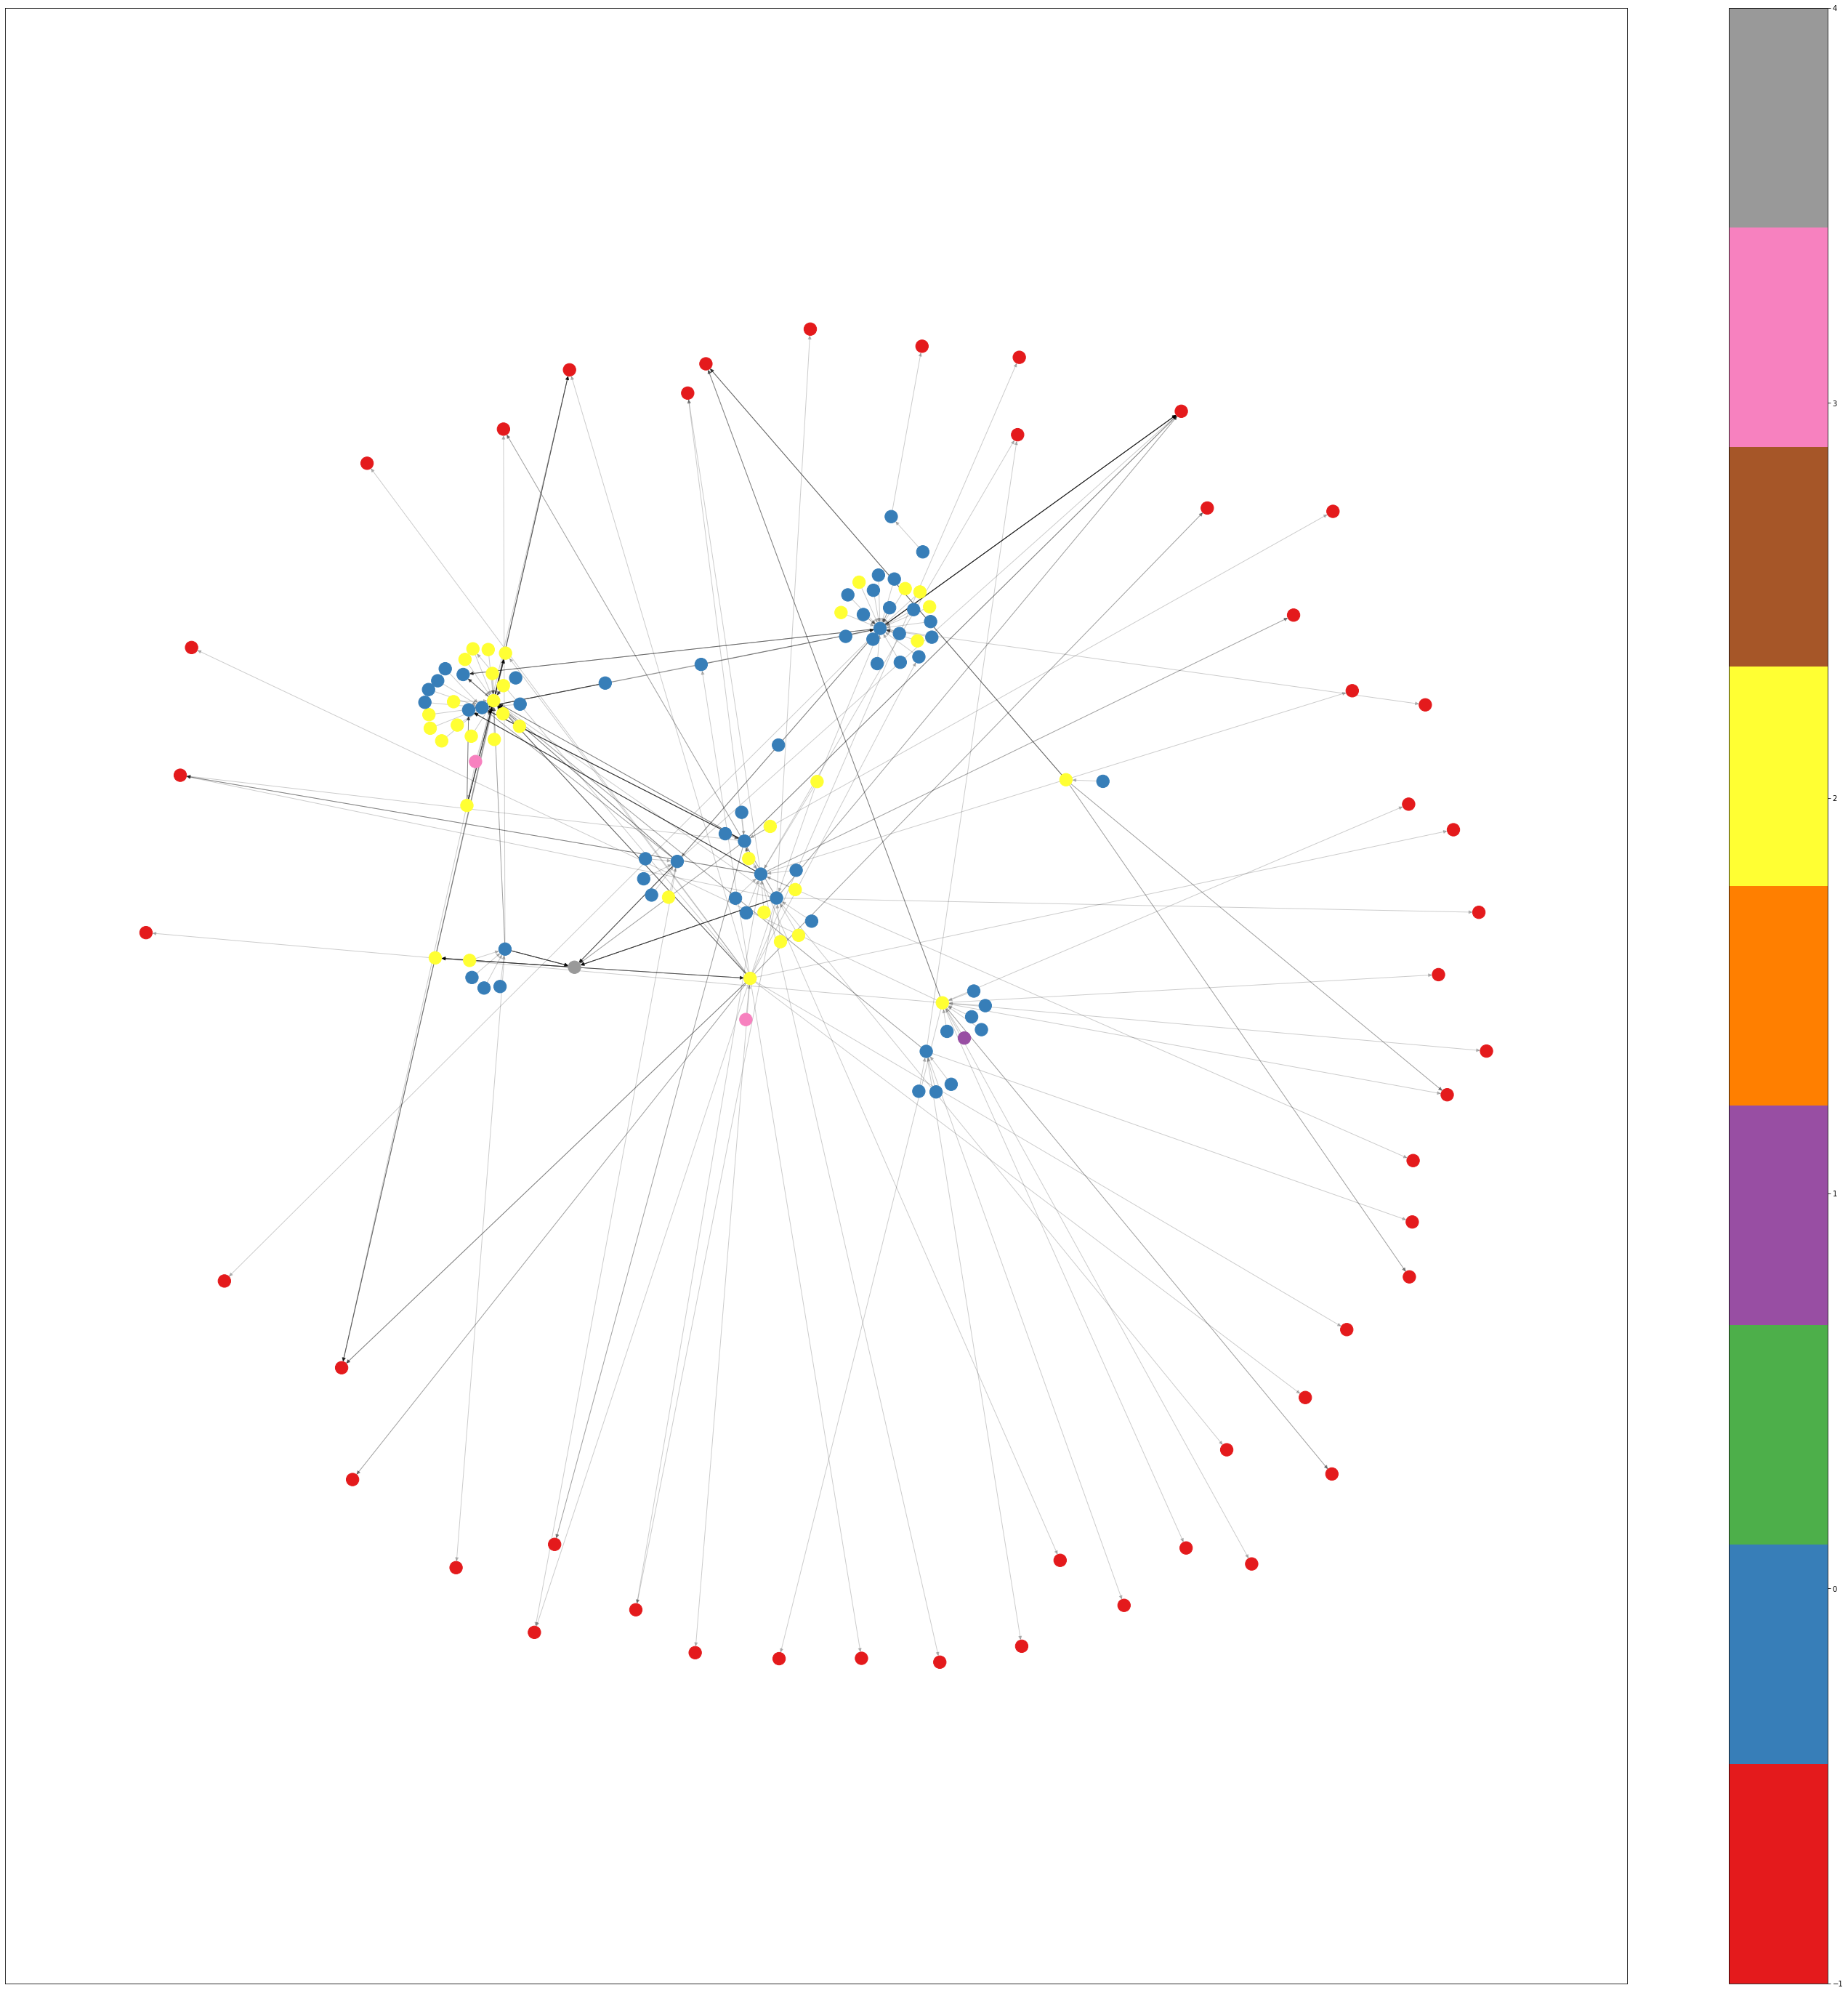

In [41]:
fig = plt.figure(figsize=(50, 50)) 

g = nx.from_pandas_edgelist(df_temp20, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.MultiDiGraph())

pos = nx.spring_layout(g)
ed = nx.draw_networkx_edges(g, pos, alpha=0.2)
nd = nx.draw_networkx_nodes(g, pos, nodelist = g.nodes(), 
                            node_color=coloring, cmap=plt.cm.Set1,
                            edge_color='black', with_labels = True,
                            font_size=5) 
plt.axis('equal')
plt.colorbar(nd)
plt.show()
fig.savefig('_TEST_color.pdf')

PREP Color all

In [53]:
tempall = pd.DataFrame({'ID':df_temp['From'], 'value':df_temp['FromLanguageFamily']})
tempall2 = pd.DataFrame({'ID':df_temp['To'], 'value':df_temp['ToLanguageFamily']})
tempall.append(tempall2, ignore_index = True)
colormapall = tempall.drop_duplicates()  #subset=['ID']
colormapall
#temp1

ID     value
0          Palmeiras   Romance
1           EC Bahia   Romance
2            Benfica   Romance
3     Vit. Guimarães   Romance
5          Caxias-RS   Romance
...              ...       ...
3321        FC Drita  Albanian
3322     KF Vllaznia  Albanian
3323  Sliema Wander.   Semitic
3324       FC Astana    Turkic
3329     Stallion FC   Unknown

[580 rows x 2 columns]

In [43]:
testcolall = nx.from_pandas_edgelist(df_temp, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguage',
                            create_using = nx.MultiDiGraph())

In [44]:
testcolall.nodes()

NodeView(('Palmeiras', 'FC Basel', 'EC Bahia', 'Benfica', 'Vit. Guimarães', 'FC Zürich', 'Caxias-RS', 'Santo André-SP', 'Grasshopper Club Zürich', 'Belenenses SAD', 'Benfica U23', 'Rio Ave FC', 'Sporting U19', 'Atlético-GO', 'Tombense', 'FC Porto B', 'FC Vaduz', 'BSC Young Boys', 'FC Porto', 'Monte Azul-SP', 'FC Thun', 'Villa Nova AC', 'Yangon Utd.', 'SC Braga B', 'FC St. Gallen', 'FC Aarau', 'Tubarão-SC', 'Juventus U19', 'Udinese Calcio', 'AS Rom', 'Inter Mailand', 'Delfino Pescara', 'Inter U19', 'FC Chiasso', 'FC Lugano', 'FC Empoli', 'Novara Calcio', 'Lazio Rom', 'AC Bellinzona', 'Juventus U23', 'Chievo Verona', 'SSC Bari', 'FC Locarno', 'US Palermo', 'FC Luzern', 'FC Turin', 'FC Bologna', 'Juventus Turin', 'Genua CFC', 'Grasshoppers', 'SC Kriens', 'Rapperswil-Jona', 'FC Winterthur', 'FC Wil 1900', 'FC Köniz', 'FC Wohlen', 'FC Schaffhausen', 'FC Dietikon', 'FC Münsingen', 'United Zürich', 'SC Brühl SG', 'FC Tuggen', 'BSC YB U21', 'SC Buochs', 'Schwamendingen', 'FC Littau', 'KRC Genk

In [45]:
colormapall = colormapall.set_index('ID')
colormapall = colormapall.reindex(testcolall.nodes())

colormapall

value
ID                      
Palmeiras        Romance
FC Basel        Germanic
EC Bahia         Romance
Benfica          Romance
Vit. Guimarães   Romance
...                  ...
Pr. Niederkorn       NaN
Sabah FK             NaN
Neftchi Baku         NaN
FCI                  NaN
Buriram Utd.         NaN

[900 rows x 1 columns]

In [46]:
colormapall['value']=pd.Categorical(colormapall['value'])
colormapall['value'].cat.codes
coloringall = colormapall['value'].cat.codes

/Users/nicowyss/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nicowyss/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


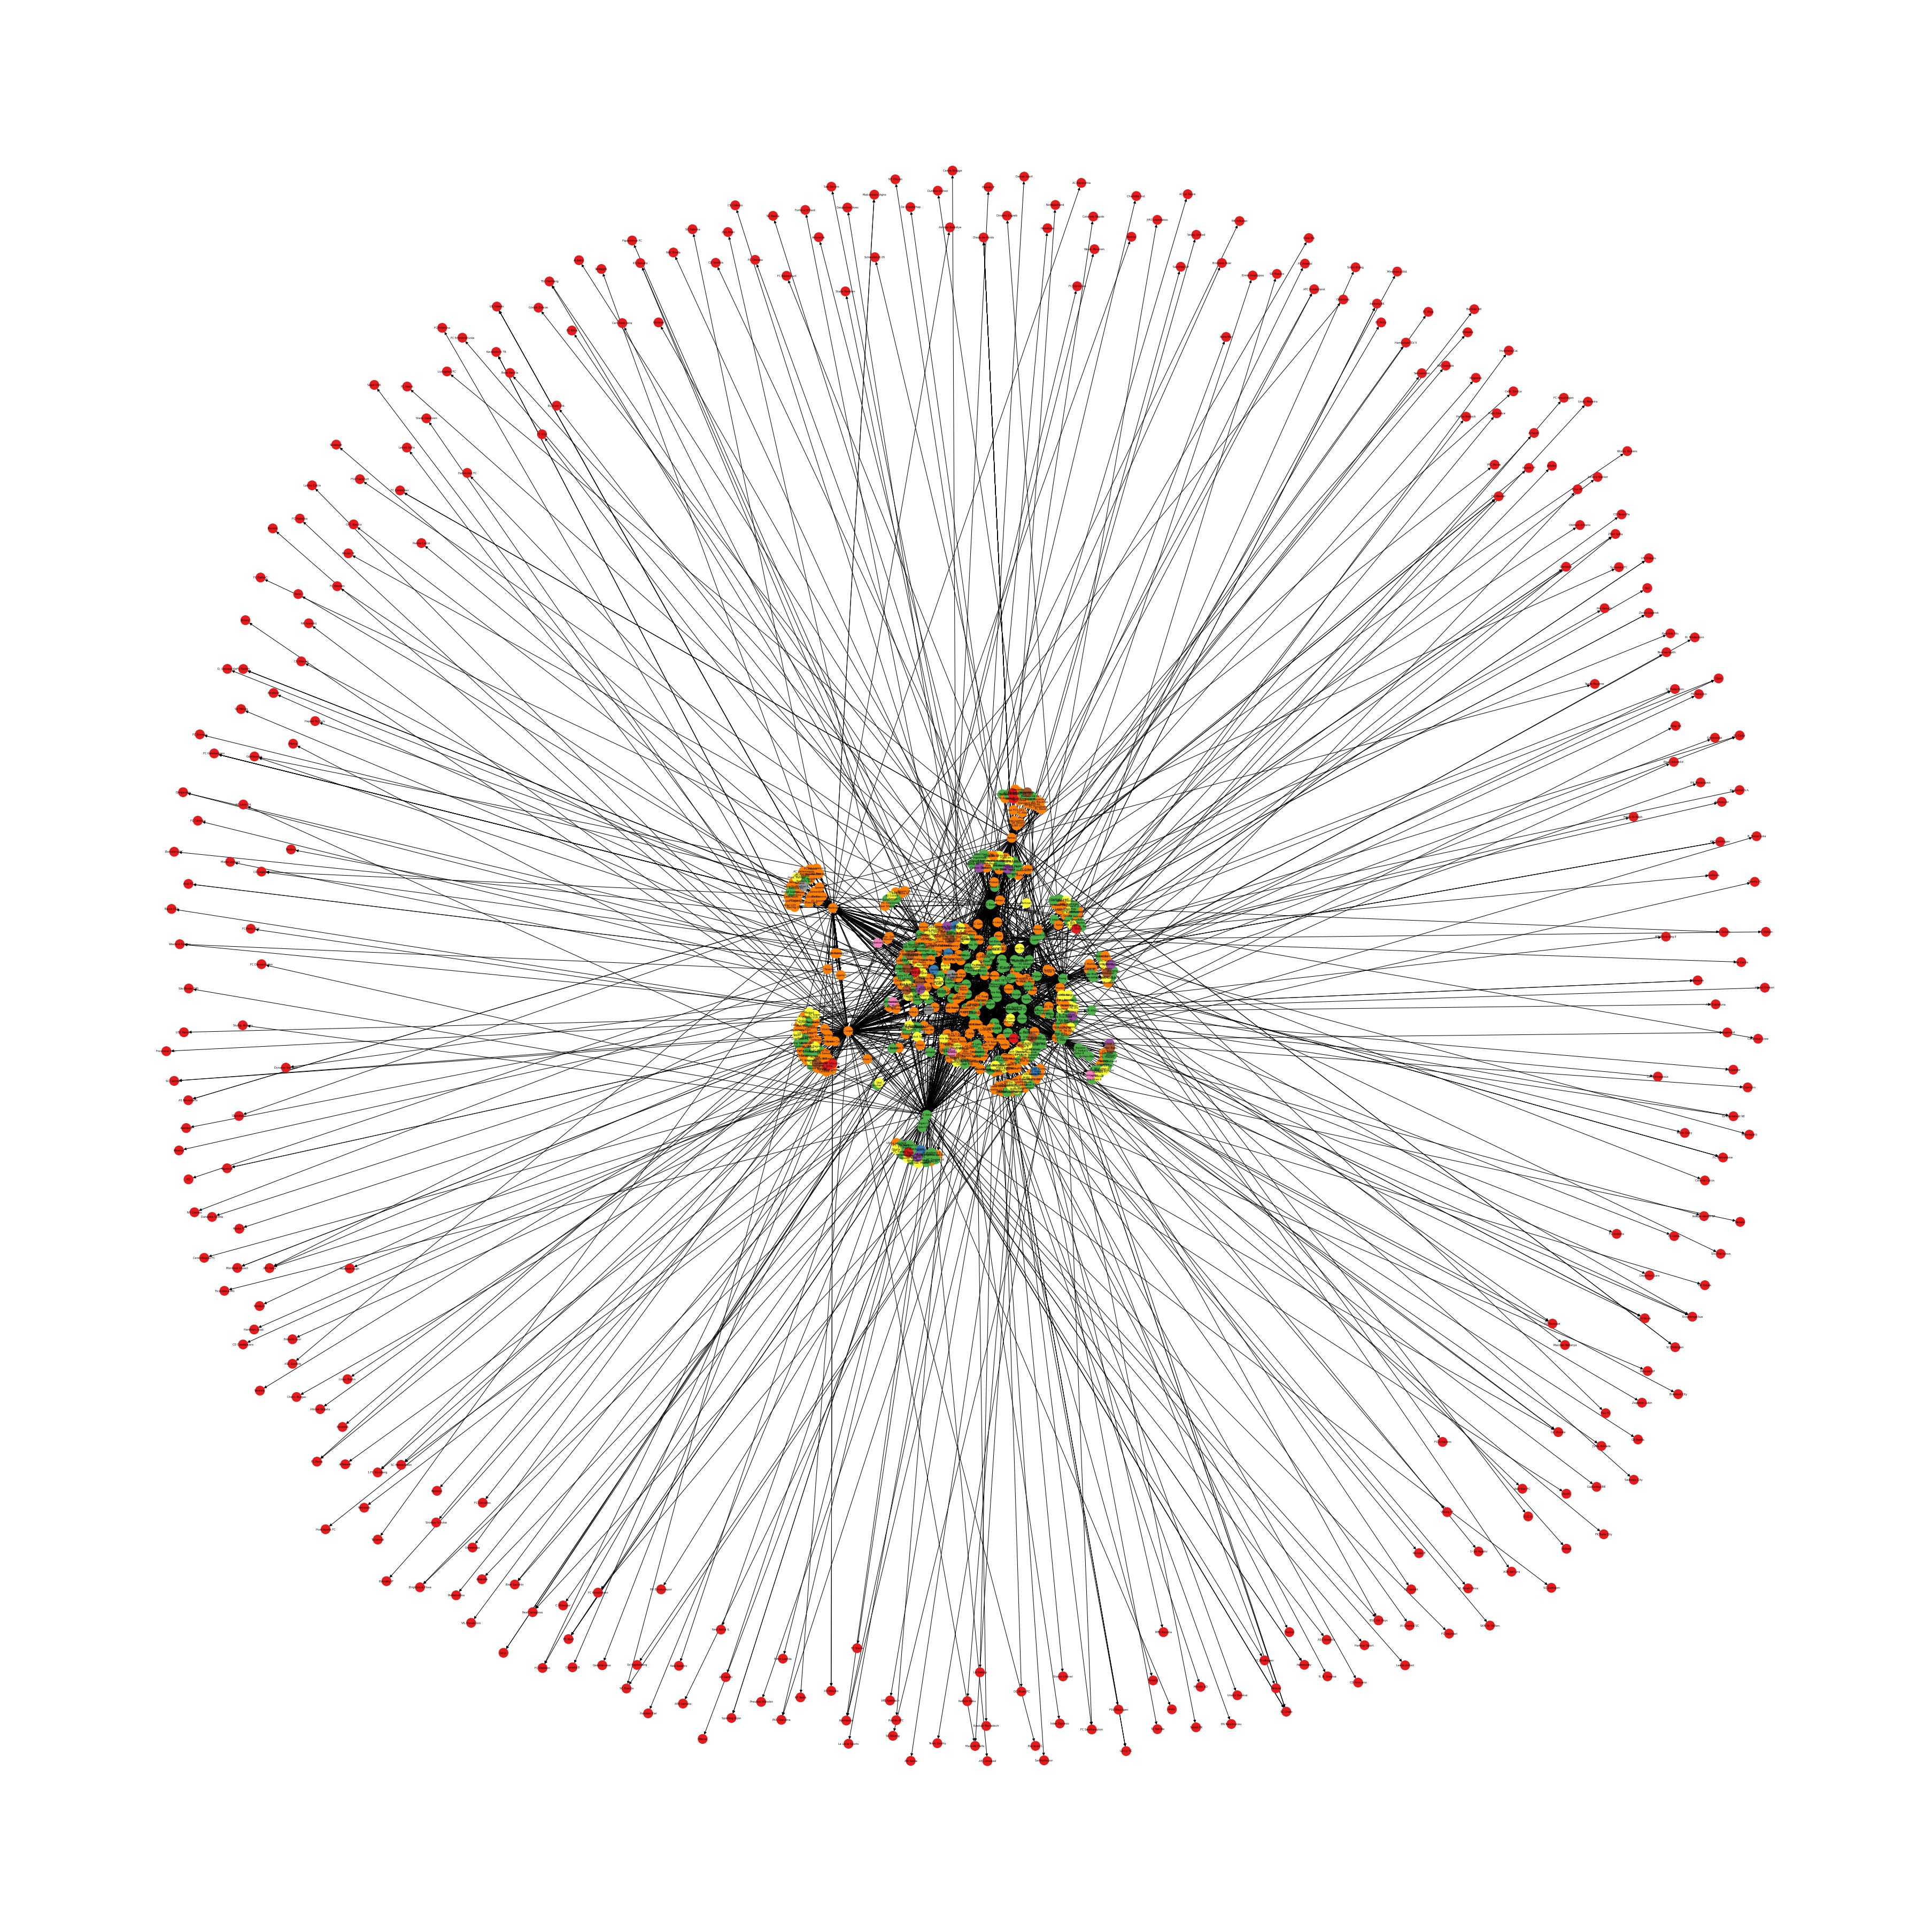

/Users/nicowyss/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


In [47]:
fig = plt.figure(figsize=(50, 50)) 

g = nx.from_pandas_edgelist(df_temp, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'FromLanguage',
                            create_using = nx.MultiDiGraph())

nx.draw(g, pos = nx.spring_layout(g), node_color=colormapall['value'].cat.codes, cmap=plt.cm.Set1, edge_color='black', with_labels = True, font_size=5) 
plt.axis('equal') 

plt.show()
fig.savefig('___Final_Network_all.pdf')

In [48]:
fig = plt.figure(figsize=(20, 20)) 

g = nx.from_pandas_edgelist(df_temp, 
                            source = 'FromLanguageFamily',
                            target = 'ToLanguageFamily',
                            edge_attr = 'FromLanguageFamily',
                            create_using = nx.MultiDiGraph())

edge = df_temp20['FromLanguageFamily']
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
edge_labels = nx.get_edge_attributes(g,'edge')
nx.draw_networkx_edge_labels(g,pos,edge_labels=formatted_edge_labels,font_color='red')
plt.show()
fig.savefig('networkedgelabel.pdf')

NameError: name 'formatted_edge_labels' is not defined

In [49]:
fig = plt.figure(figsize=(10, 10)) 
g = nx.from_pandas_edgelist(df_tempZ20, 
                            source = 'FromLanguageFamily',
                            target = 'To',
                            edge_attr = 'ToLanguageFamily',
                            create_using = nx.MultiDiGraph())
nx.draw(g, with_labels = True) 
plt.axis('scaled') 
plt.show()
fig.savefig('networkTestZ20.pdf')

NameError: name 'df_tempZ20' is not defined

<Figure size 720x720 with 0 Axes>

In [50]:
fig = plt.figure(figsize=(10, 10)) 
q = nx.from_pandas_edgelist(df_temp, 
                            source = 'From',
                            target = 'To',
                            edge_attr = 'ToLanguageFamily',
                            create_using = nx.Graph())
nx.draw(g, with_labels = True) 
plt.axis('equal') 
plt.show()
fig.savefig('network_all.pdf')

In [51]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

NameError: name 'betCent' is not defined

In [ ]:
pos = nx.spring_layout(q)

betCent = nx.betweenness_centrality(q, normalized=True, endpoints=True)
node_color = [20000.0 * q.degree(v) for v in q]
node_size =  [v * 10000 for v in betCent.values()]
plot = plt.figure(figsize = (20,20))
nx.draw_networkx(q, pos=pos, with_labels=True,
                 font_size=2,
                 node_color=node_color,
                 node_size=node_size,
                 create_using = nx.MultiDiGraph())
plt.axis('off')
plot.savefig('network_all2.pdf')

In [ ]:
 print(nx.info(g))